In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import gdown
url_brown = "https://drive.google.com/file/d/1SqTw3A99hPDbTUxZ-OoJD4wGdl0ZF3Oz/view?usp=drive_link"
gdown.download(url=url_brown, output="brown_poems.csv", fuzzy=True)

brown_poems_df = pd.read_csv("brown_poems.csv")

Downloading...
From: https://drive.google.com/uc?id=1SqTw3A99hPDbTUxZ-OoJD4wGdl0ZF3Oz
To: /content/brown_poems.csv
100%|██████████| 3.18k/3.18k [00:00<00:00, 4.51MB/s]


In [ ]:
url = "https://drive.google.com/file/d/11xtnNRZ_CP4WNIlTIMctTQOCVkj0niAF/view"
output = "Olmo_poems_clean.csv"
gdown.download(url=url, output=output, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=11xtnNRZ_CP4WNIlTIMctTQOCVkj0niAF
To: /content/Olmo_poems_clean.csv
100%|██████████| 188k/188k [00:00<00:00, 3.35MB/s]


'Olmo_poems_clean.csv'

In [ ]:
url = "https://drive.google.com/file/d/1eCbSyyBwGf7N7I8qc8ysuRv27gXBjL2l/view"
output = "claude_poems_clean.csv"
gdown.download(url=url, output=output, fuzzy=True)


Downloading...
From: https://drive.google.com/uc?id=1eCbSyyBwGf7N7I8qc8ysuRv27gXBjL2l
To: /content/claude_poems_clean.csv
100%|██████████| 182k/182k [00:00<00:00, 3.39MB/s]


'claude_poems_clean.csv'

In [ ]:
url = "https://drive.google.com/file/d/1L0ivWIkVeoPCXF8KIcviMscuumwW2n9H/view"
output = "gpt4o_poems_clean.csv"
gdown.download(url=url, output=output, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1L0ivWIkVeoPCXF8KIcviMscuumwW2n9H
To: /content/gpt4o_poems_clean.csv
100%|██████████| 201k/201k [00:00<00:00, 1.97MB/s]


'gpt4o_poems_clean.csv'

In [ ]:
url = "https://drive.google.com/file/d/1EaKHbcCY-NRH0ioQXB3L34-eztATyUo4/view?usp=drive_link"
output = "gpt_duplexes_clean.csv"
gdown.download(url=url, output=output, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1EaKHbcCY-NRH0ioQXB3L34-eztATyUo4
To: /content/gpt_duplexes_clean.csv
100%|██████████| 177k/177k [00:00<00:00, 3.85MB/s]


'gpt_duplexes_clean.csv'

In [ ]:
claude_df = pd.read_csv("claude_poems_clean.csv")     # Claude
gpt4o_df = pd.read_csv("gpt4o_poems_clean.csv")       # GPT-4o
olmo_df   = pd.read_csv("Olmo_poems_clean.csv")       # Olmo
gpt_df = pd.read_csv("gpt_duplexes_clean.csv")        # GPT4

In [ ]:
corpora = {
    "Brown (human)": brown_poems_df,
    "Claude": claude_df,
    "GPT-4o": gpt4o_df,
    "Olmo": olmo_df,
    "GPT4": gpt_df
}

In [ ]:
def add_poem_length(df):
    df = df.copy()
    df["poem_length"] = df["poem_text"].apply(
        lambda poem: len([line for line in str(poem).split("\n") if line.strip() != ""])
    )
    return df

for name in corpora:
    corpora[name] = add_poem_length(corpora[name])


Pronoun Analysis

In [ ]:
!pip install -q spacy
!python -m spacy download en_core_web_sm -q

import spacy
nlp = spacy.load("en_core_web_sm")

def count_pronouns(poem_text):
    poem = nlp(str(poem_text))

    counts = {
        "pronoun_count": 0,
        "plural_1_count": 0,
        "plural_2_count": 0,
        "plural_3_count": 0,
        "sing_1_count": 0,
        "sing_2_count": 0,
        "sing_3_count": 0,
    }

    for token in poem:
        if token.pos_ == "PRON":
            counts["pronoun_count"] += 1

            number = token.morph.get("Number")
            person = token.morph.get("Person")

            if number == ["Plur"]:
                if person == ["1"]:
                    counts["plural_1_count"] += 1
                elif person == ["2"]:
                    counts["plural_2_count"] += 1
                elif person == ["3"]:
                    counts["plural_3_count"] += 1
            else:  # treat everything else as singular (or unknown number)
                if person == ["1"]:
                    counts["sing_1_count"] += 1
                elif person == ["2"]:
                    counts["sing_2_count"] += 1
                elif person == ["3"]:
                    counts["sing_3_count"] += 1

    return pd.Series(counts)

# Apply pronoun counting to each corpus
for name, df in corpora.items():
    pronoun_cols = [
        "pronoun_count", "plural_1_count", "plural_2_count", "plural_3_count",
        "sing_1_count", "sing_2_count", "sing_3_count",
    ]
    corpora[name][pronoun_cols] = corpora[name]["poem_text"].apply(count_pronouns)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 33.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
def normalize_pronoun_counts(df):
    df = df.copy()
    df["plural_1_prop"] = df["plural_1_count"] / df["pronoun_count"]
    df["plural_2_prop"] = df["plural_2_count"] / df["pronoun_count"]
    df["plural_3_prop"] = df["plural_3_count"] / df["pronoun_count"]
    df["sing_1_prop"]   = df["sing_1_count"]   / df["pronoun_count"]
    df["sing_2_prop"]   = df["sing_2_count"]   / df["pronoun_count"]
    df["sing_3_prop"]   = df["sing_3_count"]   / df["pronoun_count"]

    # avoid NaNs when pronoun_count = 0
    df = df.fillna(0)
    return df

normalized_corpora = {}
for name, df in corpora.items():
    normalized_corpora[name] = normalize_pronoun_counts(df)


In [ ]:
pronoun_types = [
    "plural_1_prop", "plural_2_prop", "plural_3_prop",
    "sing_1_prop", "sing_2_prop", "sing_3_prop",
]

mean_props = {}
for name, df in normalized_corpora.items():
    mean_props[name] = df[pronoun_types].mean()

mean_props_df = pd.DataFrame(mean_props, index=pronoun_types)


In [ ]:
mean_props_df.index = [
    "Plural 1st person",
    "Plural 2nd person",
    "Plural 3rd person",
    "Singular 1st person",
    "Singular 2nd person",
    "Singular 3rd person",
]

print("=== Mean Pronoun Proportions (per corpus) ===")
print(mean_props_df.round(3))

=== Mean Pronoun Proportions (per corpus) ===
                     Brown (human)  Claude  GPT-4o   Olmo   GPT4
Plural 1st person            0.095   0.234   0.309  0.158  0.156
Plural 2nd person            0.000   0.000   0.000  0.000  0.000
Plural 3rd person            0.033   0.083   0.134  0.045  0.106
Singular 1st person          0.579   0.288   0.183  0.373  0.181
Singular 2nd person          0.052   0.061   0.016  0.055  0.039
Singular 3rd person          0.149   0.124   0.127  0.126  0.257


In [ ]:
summary_stats = {}
for name, df in corpora.items():
    summary_stats[name] = {
        "mean_poem_length_lines": df["poem_length"].mean(),
        "median_poem_length_lines": df["poem_length"].median(),
        "mean_pronouns_per_poem": df["pronoun_count"].mean(),
        "median_pronouns_per_poem": df["pronoun_count"].median(),
    }

summary_stats_df = pd.DataFrame(summary_stats).T
print("\n=== Poem Length & Pronoun Count Summary ===")
print(summary_stats_df.round(2))



=== Poem Length & Pronoun Count Summary ===
               mean_poem_length_lines  median_poem_length_lines  \
Brown (human)                   14.00                      14.0   
Claude                          14.67                      15.0   
GPT-4o                          17.02                      16.0   
Olmo                            17.25                      16.0   
GPT4                            13.42                      14.0   

               mean_pronouns_per_poem  median_pronouns_per_poem  
Brown (human)                   15.00                      14.0  
Claude                          15.69                      16.0  
GPT-4o                           9.69                       9.0  
Olmo                            14.12                      14.0  
GPT4                            10.77                      10.0  


Bar Chart

In [ ]:
labels = list(mean_props_df.index)
x = np.arange(len(labels))
width = 0.12  # narrower because we have several corpora

plt.figure(figsize=(14, 6))


<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

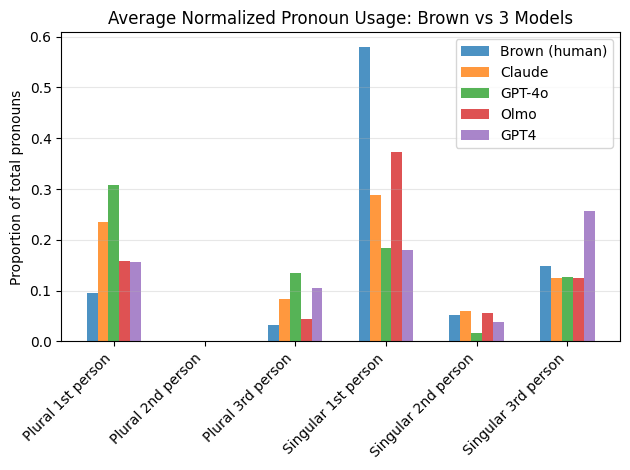

In [ ]:
# Iterate over corpora for grouped bars
for i, (name, series) in enumerate(mean_props_df.items()):
    plt.bar(
        x + (i - len(mean_props_df.columns)/2) * width + width/2,
        series.values,
        width=width,
        label=name,
        alpha=0.8
    )

plt.xticks(x, labels, rotation=45, ha="right")
plt.ylabel("Proportion of total pronouns")
plt.title("Average Normalized Pronoun Usage: Brown vs 3 Models")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


Difference Plot

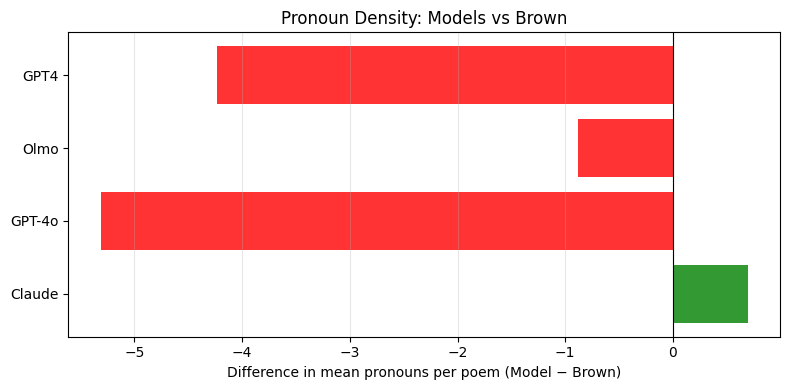

In [ ]:
brown_mean_pronouns = summary_stats_df.loc["Brown (human)", "mean_pronouns_per_poem"]
model_names = [name for name in summary_stats_df.index if name != "Brown (human)"]

differences = [
    summary_stats_df.loc[name, "mean_pronouns_per_poem"] - brown_mean_pronouns
    for name in model_names
]

plt.figure(figsize=(8, 4))
colors = ["green" if d > 0 else "red" for d in differences]
plt.barh(model_names, differences, alpha=0.8, color=colors)
plt.axvline(0, color="black", linewidth=0.8)
plt.xlabel("Difference in mean pronouns per poem (Model − Brown)")
plt.title("Pronoun Density: Models vs Brown")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

Optional Combined Fighting Word

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter


In [ ]:
brown_df  = pd.read_csv("brown_poems.csv")
claude_df = pd.read_csv("claude_poems_clean.csv")
gpt4o_df  = pd.read_csv("gpt4o_poems_clean.csv")
olmo_df   = pd.read_csv("Olmo_poems_clean.csv")
gpt_df    = pd.read_csv("gpt_duplexes_clean.csv")

corpora = {
    "Brown": brown_df,
    "Claude": claude_df,
    "GPT-4o": gpt4o_df,
    "Olmo": olmo_df,
    "GPT4": gpt_df
}

In [ ]:
# Download fighting_words module once
!wget -q https://raw.githubusercontent.com/jmhessel/FightingWords/refs/heads/master/fighting_words_py3.py

import fighting_words_py3


In [ ]:
# Ensure all have poem_text
for name, df in corpora.items():
    if "poem_text" not in df.columns:
        raise ValueError(f"{name} CSV is missing 'poem_text' column.")

In [ ]:
def run_fighting_words(brown_texts, model_texts, prior=0.05):

    return fighting_words_py3.bayes_compare_language(
        brown_texts,
        model_texts,
        prior=prior
    )

In [ ]:
def plot_fighting_words(model_name, results, top_n=10):
    # model-leaning = lowest scores
    lowest = results[:top_n]
    # Brown-leaning = highest scores
    highest = results[-top_n:]

    words = [w for (w, score) in lowest + highest]
    scores = [float(score) for (w, score) in lowest + highest]

    plt.figure(figsize=(12, 8))

    colors = ['#d62728' if s < 0 else '#2ca02c' for s in scores]
    plt.barh(words, scores, color=colors)

    plt.axvline(0, color='black', linewidth=0.8)

    plt.title(f"Most Distinctive Words: Brown vs {model_name}", fontsize=15)
    plt.xlabel("Fighting Words Score")

    # Left = Model leaning
    plt.text(min(scores)*0.9, len(words)-1,
             f"More distinctive\nfor {model_name}",
             color='#d62728', fontsize=11, fontweight='bold')

    # Right = Brown leaning
    plt.text(max(scores)*0.7, 1,
             "More distinctive\nfor Brown Poems",
             color='#2ca02c', fontsize=11, fontweight='bold')

    plt.tight_layout()
    plt.show()


In [ ]:
for name, df in corpora.items():
    df["poem_text"] = df["poem_text"].fillna("").astype(str)


===== Running Fighting Words: Claude vs Brown =====
Vocab size is 257
Comparing language...


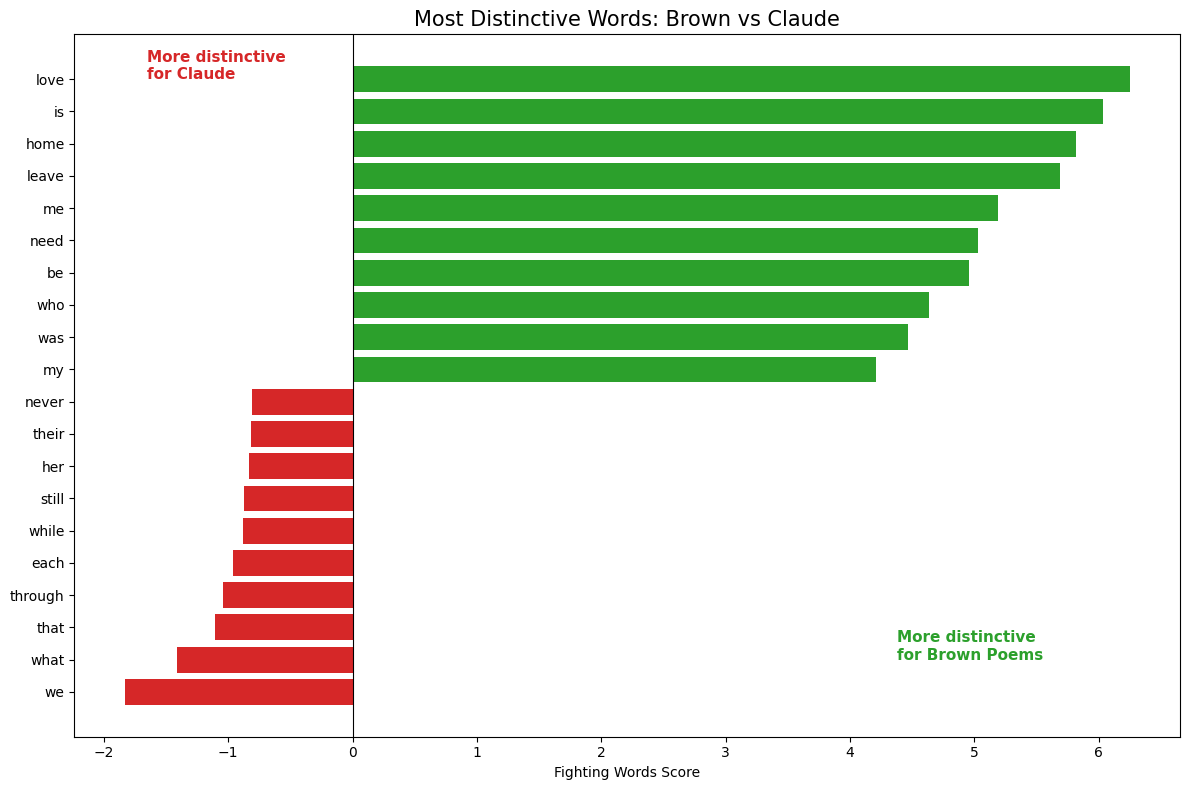


===== Running Fighting Words: GPT-4o vs Brown =====
Vocab size is 410
Comparing language...


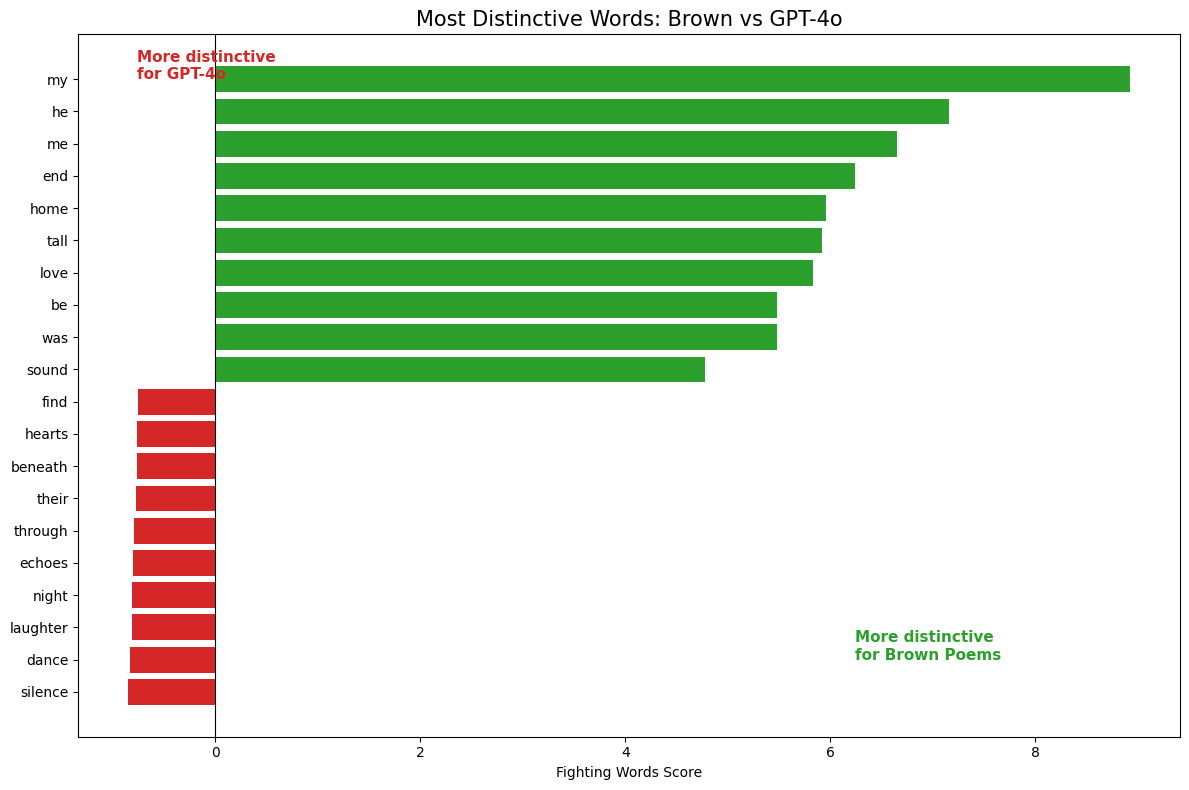


===== Running Fighting Words: Olmo vs Brown =====
Vocab size is 373
Comparing language...


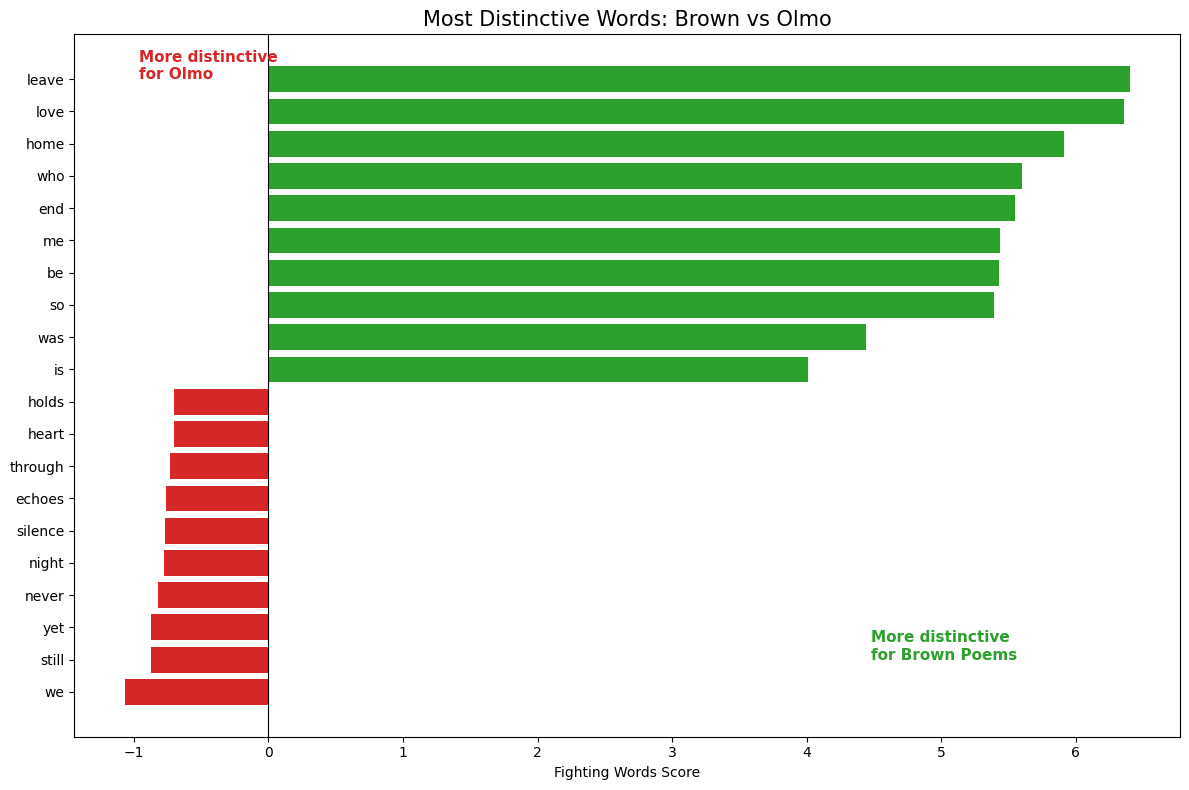


===== Running Fighting Words: GPT4 vs Brown =====
Vocab size is 272
Comparing language...


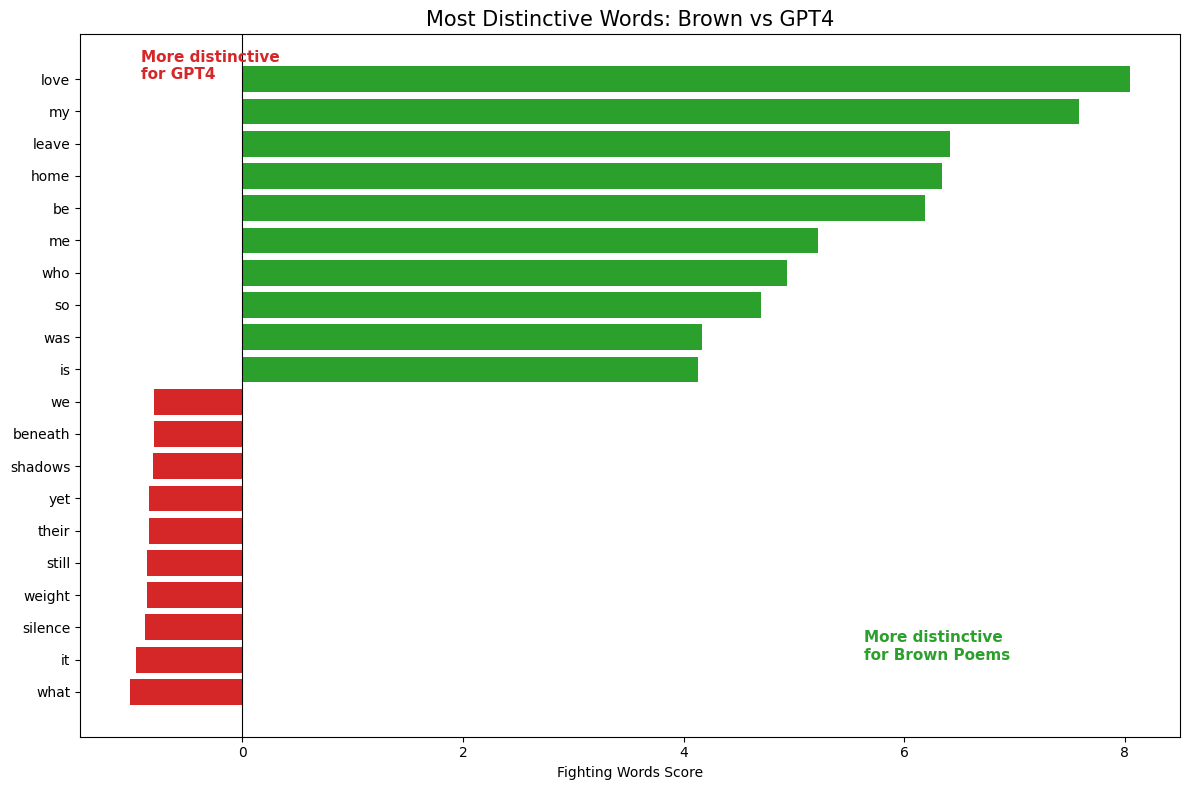

In [ ]:
brown_texts = brown_df["poem_text"].tolist()

all_results = {}

for model_name, df in corpora.items():
    # Skip comparison of Brown vs Brown, as it's not meaningful for identifying distinctive words
    if model_name == "Brown (human)" or model_name == "Brown":
        continue

    print(f"\n===== Running Fighting Words: {model_name} vs Brown =====")

    model_texts = df["poem_text"].tolist()

    results = run_fighting_words(brown_texts, model_texts)
    all_results[model_name] = results

    # Save CSV of full ranked list
    out_df = pd.DataFrame(results, columns=["word", "score"])
    out_df.to_csv(f"fighting_words_{model_name}_vs_brown.csv", index=False)

    # Plot top distinctive words
    plot_fighting_words(model_name, results, top_n=10)

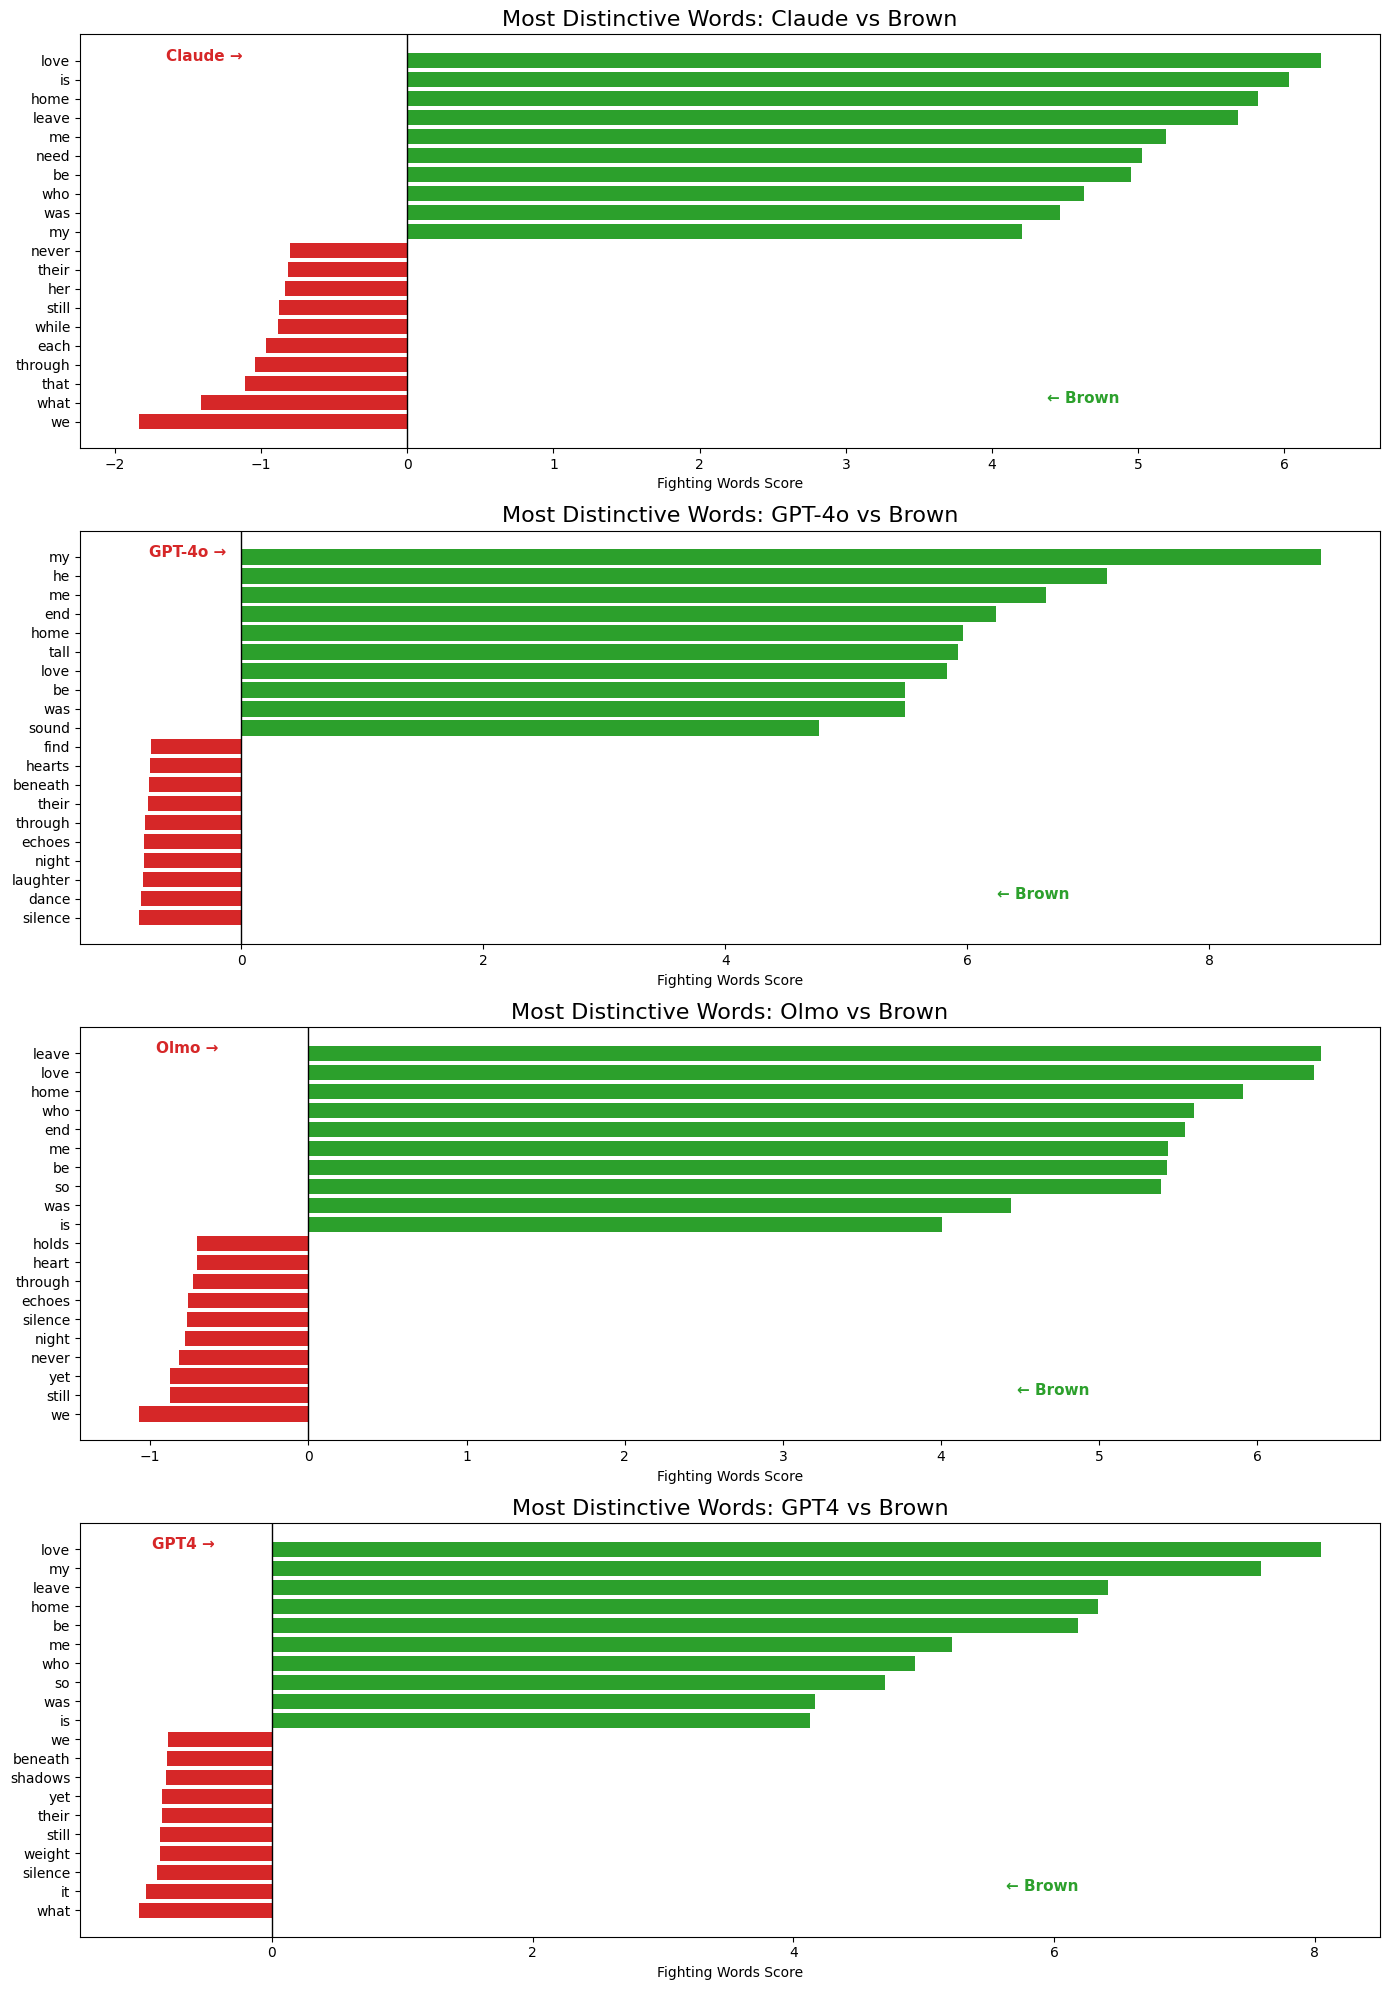

In [ ]:
def combined_fighting_words_plot(all_results, top_n=10):
    """
    Create a combined multi-panel chart showing distinctive words
    for Claude, GPT-4o, Olmo, and GPT4 vs Brown.
    """

    models = list(all_results.keys())
    num_models = len(models)

    fig, axes = plt.subplots(num_models, 1, figsize=(14, 5 * num_models))

    if num_models == 1:
        axes = [axes]  # ensure iterable

    for ax, model_name in zip(axes, models):

        results = all_results[model_name]

        # Model-leaning = lowest scores
        lowest = results[:top_n]
        # Brown-leaning = highest scores
        highest = results[-top_n:]

        words = [w for (w, score) in lowest + highest]
        scores = [float(score) for (w, score) in lowest + highest]

        colors = ['#d62728' if s < 0 else '#2ca02c' for s in scores]

        ax.barh(words, scores, color=colors)
        ax.axvline(0, color='black', linewidth=1)

        ax.set_title(f"Most Distinctive Words: {model_name} vs Brown", fontsize=16)
        ax.set_xlabel("Fighting Words Score")

        # Left = Model leaning
        ax.text(min(scores)*0.9, len(words)-1,
             f"{model_name} →",
             color='#d62728', fontsize=11, fontweight='bold')

        # Right = Brown leaning
        ax.text(max(scores)*0.7, 1,
             "← Brown",
             color='#2ca02c', fontsize=11, fontweight='bold')

    plt.tight_layout()
    plt.show()

combined_fighting_words_plot(all_results, top_n=10)

In [ ]:
def combined_grouped_bar(all_results, top_n=10):
    """
    Create a single grouped bar chart comparing distinctive words
    for Claude, GPT-4o, Olmo, and GPT4 vs Brown.
    """

    # COLORS PER MODEL
    colors = {
        "Claude": "#d62728",   # red
        "GPT-4o": "#1f77b4",   # blue
        "Olmo":   "#2ca02c",   # green
        "GPT4":   "#9467bd",   # purple
    }

    # Collect top distinctive words per model
    model_words = {}
    for model_name, results in all_results.items():
        lowest = results[:top_n]         # model-leaning
        highest = results[-top_n:]       # Brown-leaning
        combined = lowest + highest      # total 20 words
        model_words[model_name] = {
            w: float(score)
            for (w, score) in combined
        }

    # Build a union of all words
    all_words = sorted({w for d in model_words.values() for w in d.keys()})

    # Build a matrix: rows = words, cols = model scores
    data = []
    for w in all_words:
        row = [model_words[m].get(w, 0) for m in colors.keys()]
        data.append(row)

    df = pd.DataFrame(data, index=all_words, columns=colors.keys())

    # Plotting
    plt.figure(figsize=(16, max(8, len(all_words) * 0.4)))

    bar_width = 0.25
    x = np.arange(len(all_words))

    for i, (model_name, color) in enumerate(colors.items()):
        plt.barh(
            x + i * bar_width,
            df[model_name],
            height=bar_width,
            color=color,
            label=model_name,
            alpha=0.85
        )

    plt.axvline(0, color="black", linewidth=1)
    plt.yticks(x + bar_width, all_words)
    plt.title("Combined Distinctive Word Comparison (Grouped Bars)", fontsize=18)
    plt.xlabel("Fighting Words Score")
    plt.legend()
    plt.tight_layout()
    plt.show()

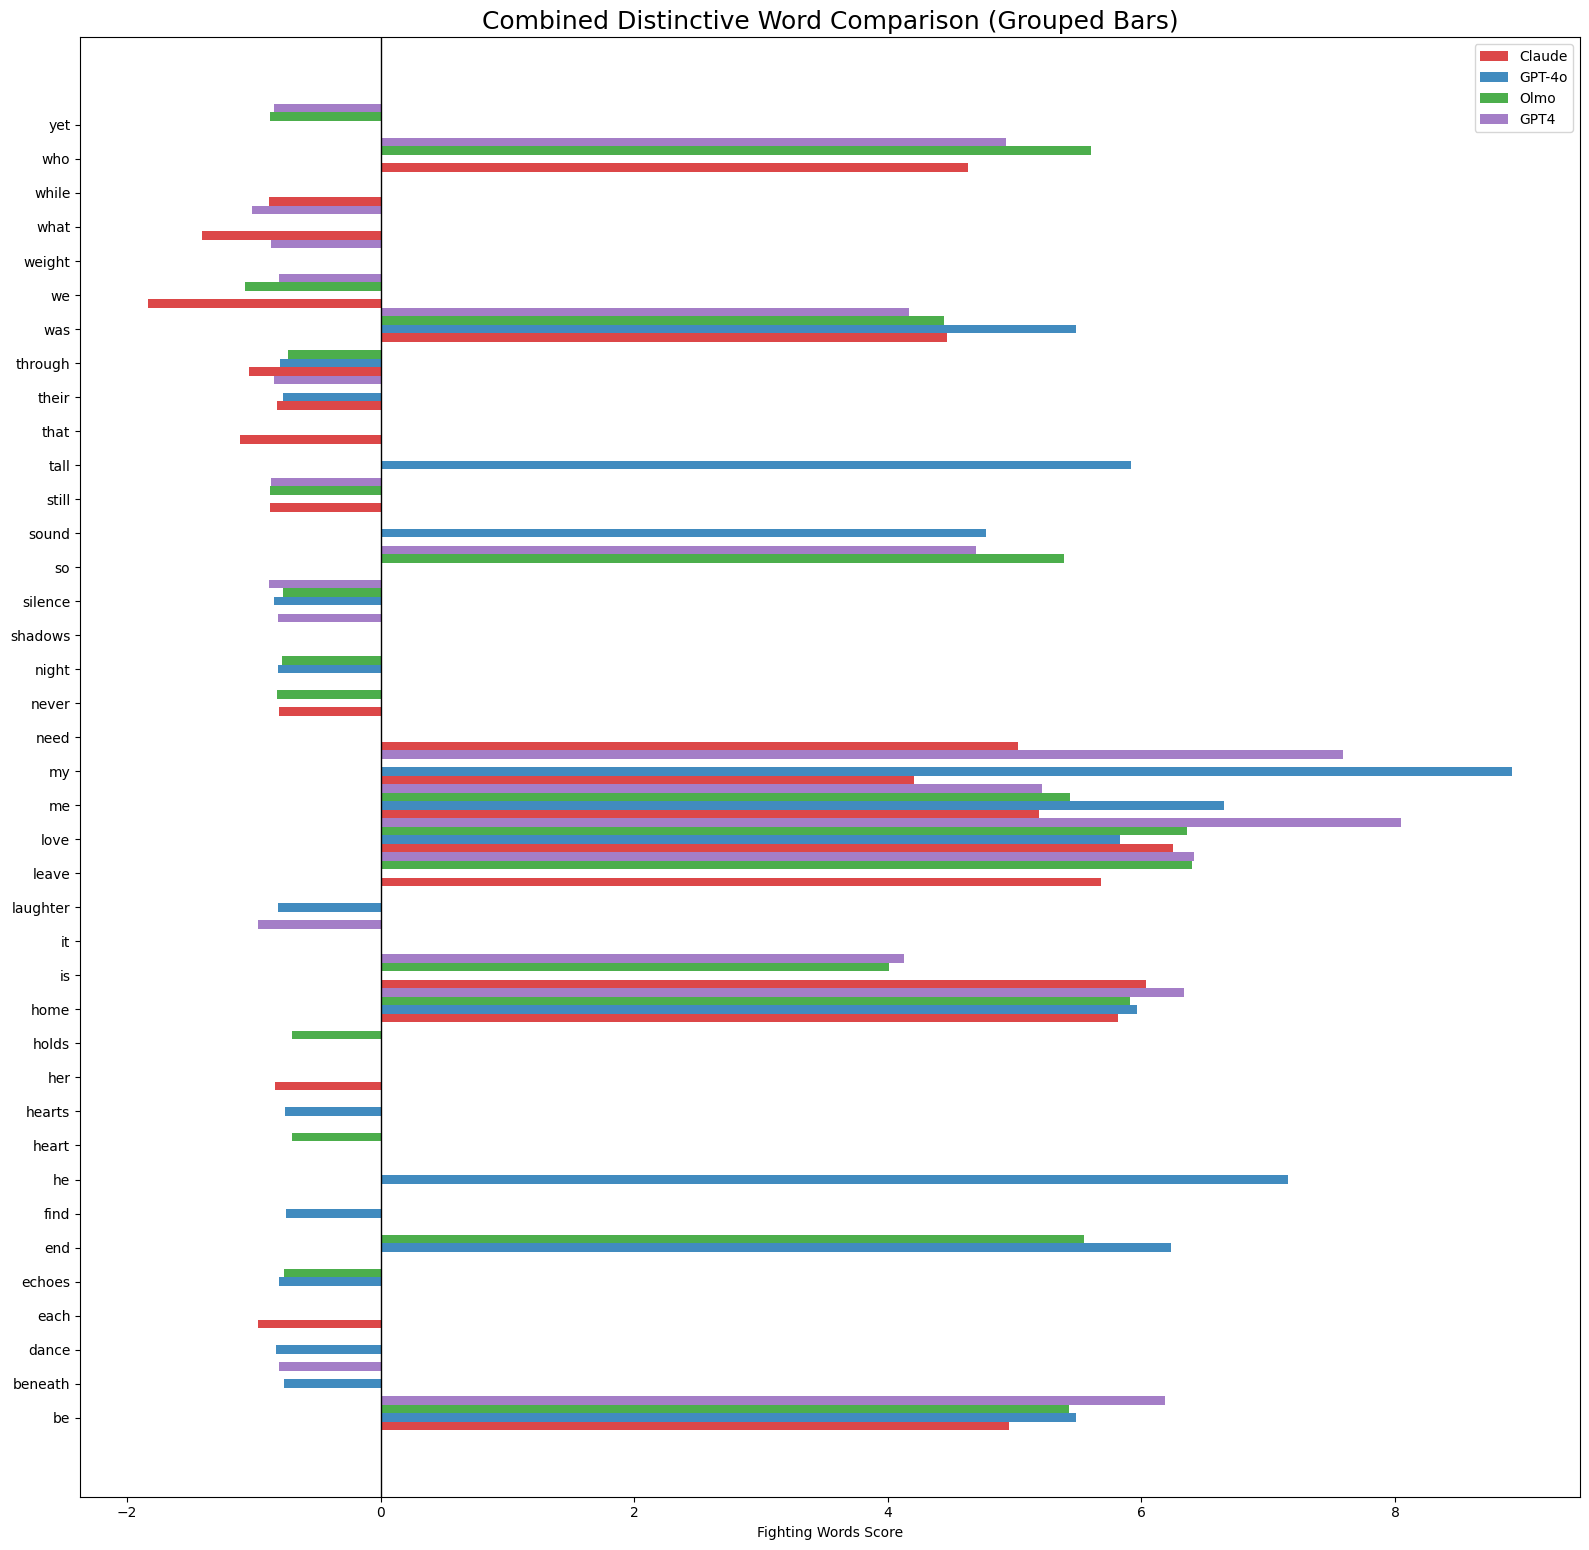

In [ ]:
combined_grouped_bar(all_results, top_n=10)

In [ ]:
def combined_single_barchart(all_results, top_n=10):
    # MODEL COLORS
    model_colors_dark = {
        "Claude":  "#d62728",  # deep red
        "GPT-4o":  "#1f77b4",  # deep blue
        "Olmo":    "#2ca02c",  # deep green
        "GPT4":   "#9467bd",   # purple
    }

    model_colors_light = {
        "Claude":  "#ff9896",  # light red
        "GPT-4o":  "#aec7e8",  # light blue
        "Olmo":    "#98df8a",  # light green
        "GPT4":    "#c5b0d5",  # light purple
    }

    words = []
    scores = []
    bar_colors = []

    for model_name, results in all_results.items():
        lowest = results[:top_n]      # model-leaning (negative scores)
        highest = results[-top_n:]    # Brown-leaning (positive scores)

        for w, s in lowest + highest:
            s = float(s)
            words.append(f"{model_name}: {w}")
            scores.append(s)

            # DARK = model-leaning (negative)
            # LIGHT = Brown-leaning (positive)
            if s < 0:
                bar_colors.append(model_colors_dark[model_name])
            else:
                bar_colors.append(model_colors_light[model_name])

    plt.figure(figsize=(16, len(words) * 0.35))
    plt.barh(words, scores, color=bar_colors)
    plt.axvline(0, color='black', linewidth=1.2)

    plt.title("Combined Distinctive Words Across All Models", fontsize=18)
    plt.xlabel("Fighting Words Score")

    import matplotlib.patches as mpatches

    legend_items = [
        mpatches.Patch(color="#d62728", label="Claude model-leaning"),
        mpatches.Patch(color="#ff9896", label="Claude Brown-leaning"),
        mpatches.Patch(color="#1f77b4", label="GPT-4o model-leaning"),
        mpatches.Patch(color="#aec7e8", label="GPT-4o Brown-leaning"),
        mpatches.Patch(color="#2ca02c", label="Olmo model-leaning"),
        mpatches.Patch(color="#98df8a", label="Olmo Brown-leaning"),
        mpatches.Patch(color="#9467bd", label="GPT4 model-learning"),
        mpatches.Patch(color="#c5b0d5", label="GPT4 Brown-learning")
    ]

    plt.legend(handles=legend_items, loc="lower right", fontsize=10)
    plt.tight_layout()
    plt.show()

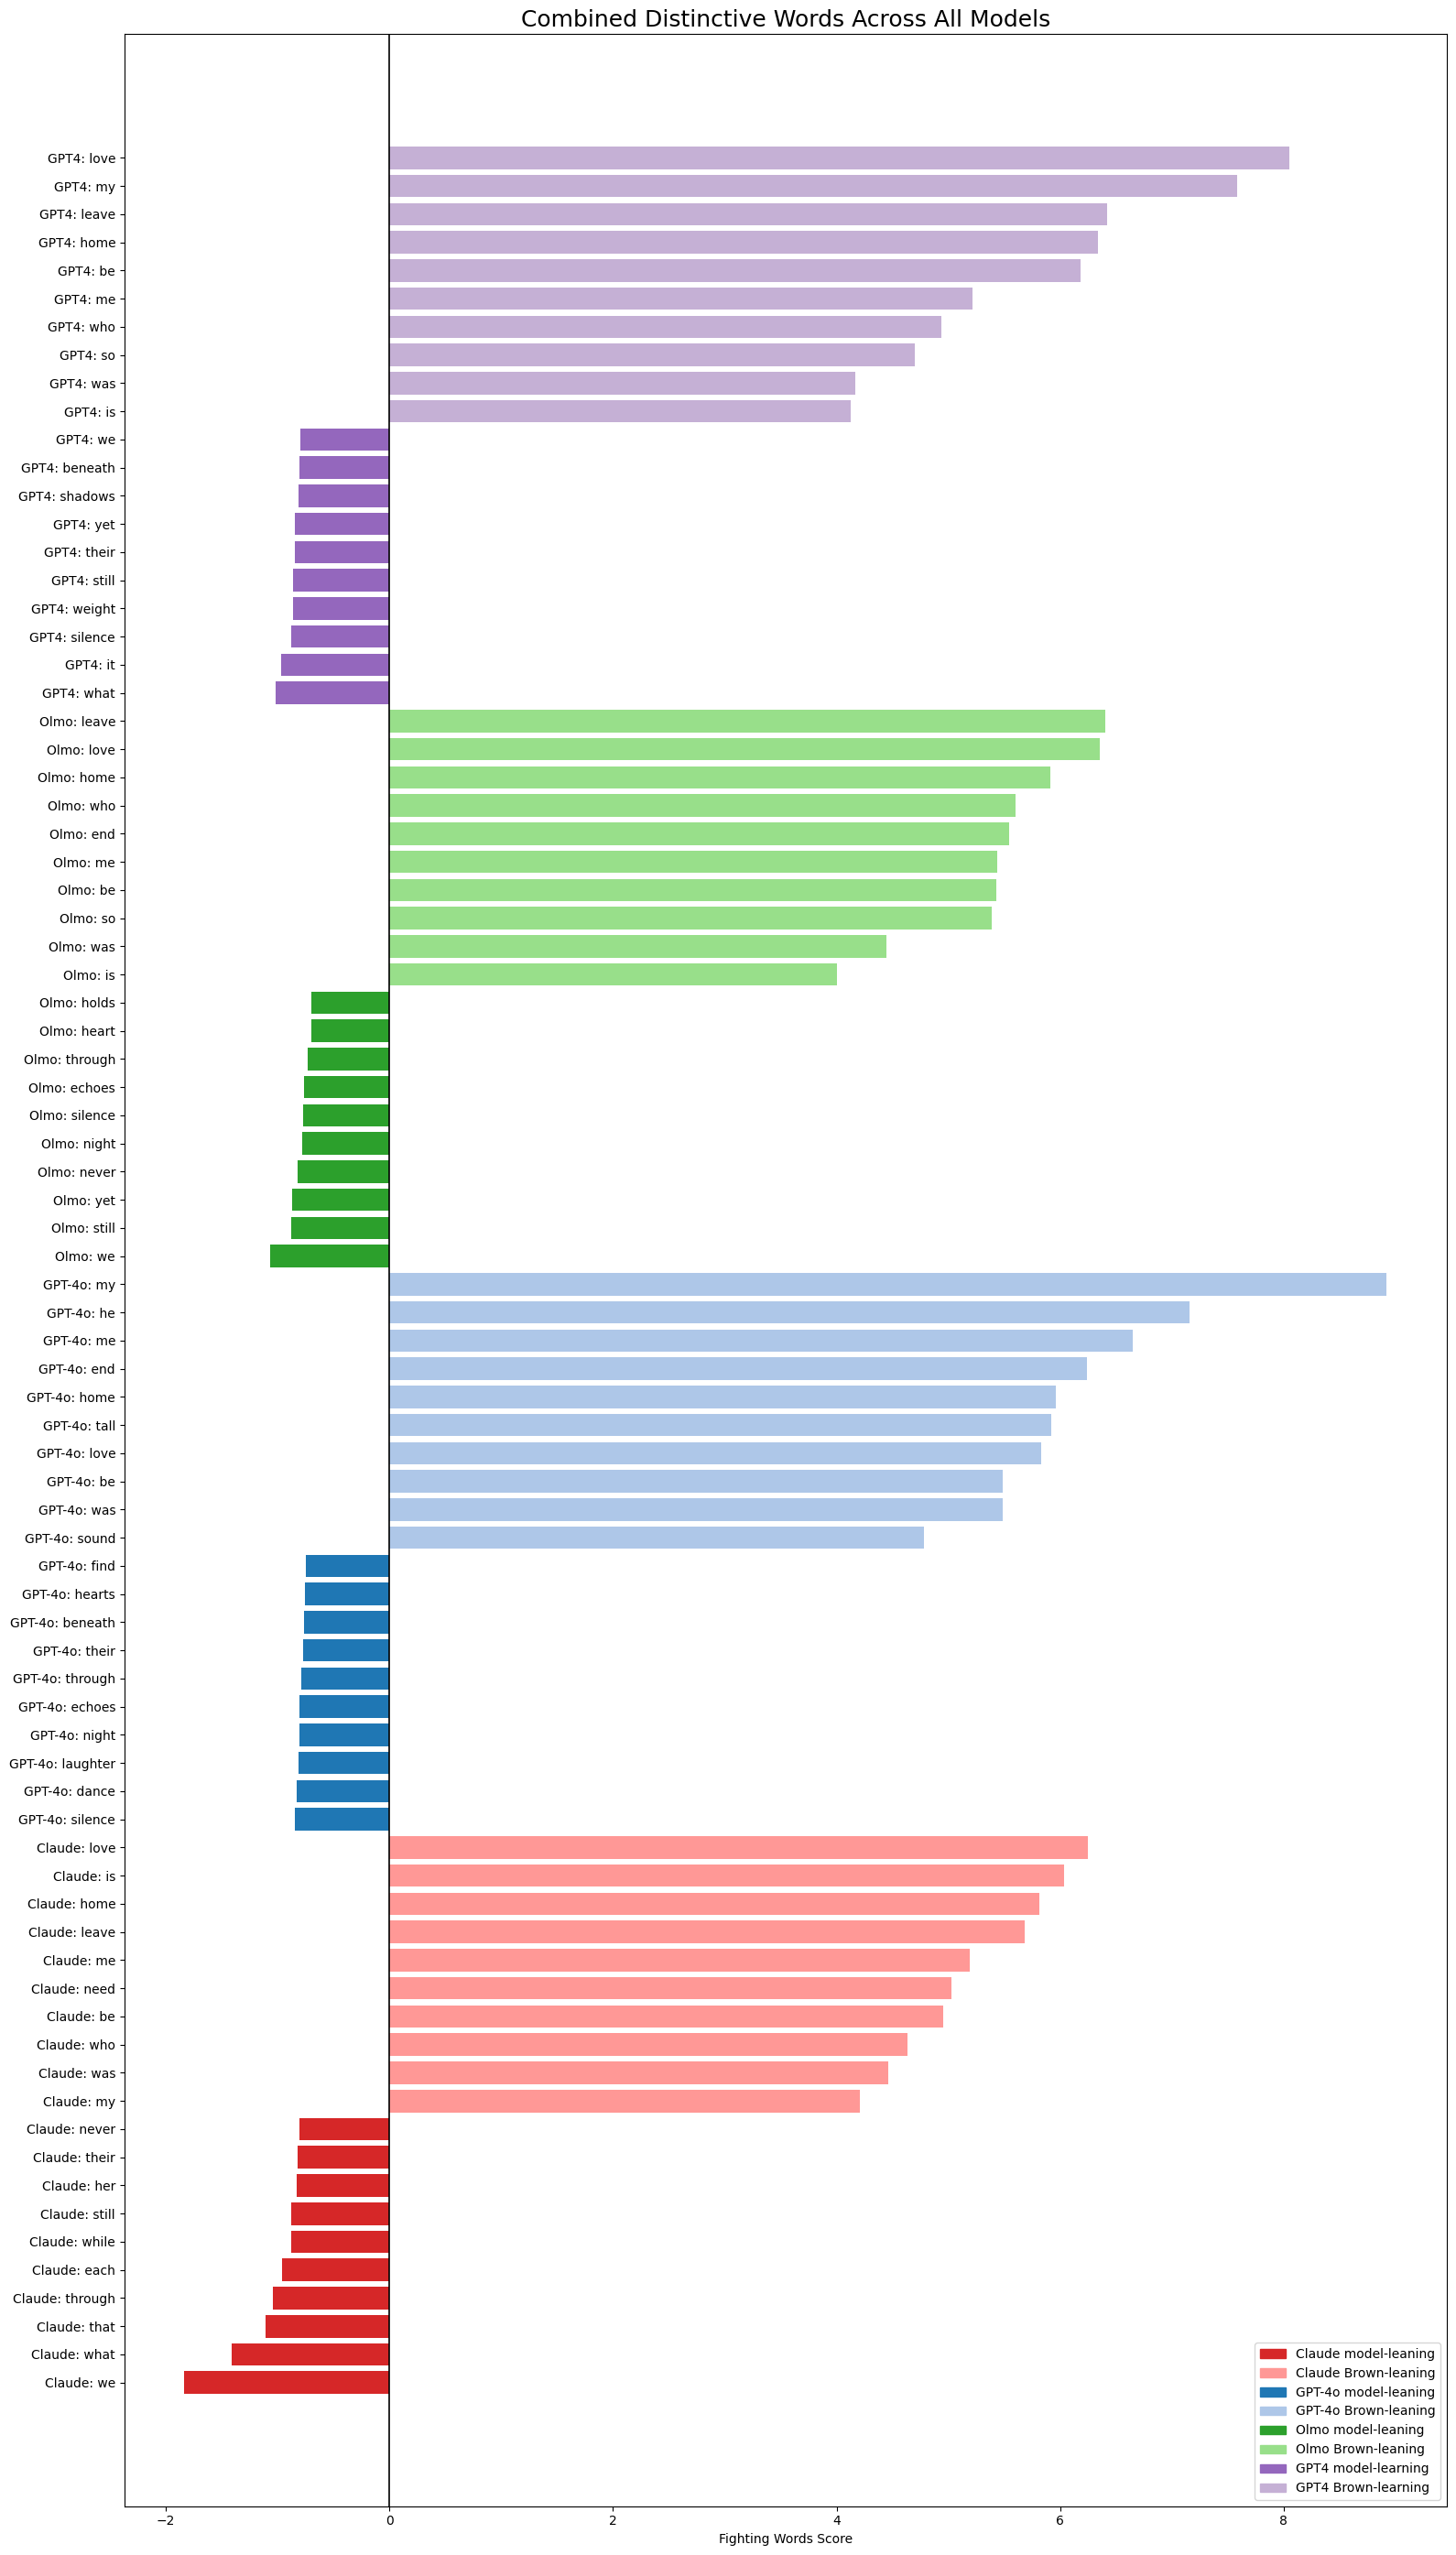

In [ ]:
combined_single_barchart(all_results, top_n=10)